In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
train_csv_path = "/content/drive/My Drive/CS412/train.csv"
#train_csv_path = '/kaggle/input/bigquery-geotab-intersection-congestion/train.csv'
test_csv_path = "/content/drive/My Drive/CS412/test.csv"
df = pd.read_csv(train_csv_path)
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     RowId  IntersectionId   Latitude  Longitude  \
0  1921357               0  33.791659 -84.430032   
1  1921358               0  33.791659 -84.430032   
2  1921359               0  33.791659 -84.430032   
3  1921360               0  33.791659 -84.430032   
4  1921361               0  33.791659 -84.430032   

                EntryStreetName                ExitStreetName EntryHeading  \
0  Marietta Boulevard Northwest  Marietta Boulevard Northwest           NW   
1  Marietta Boulevard Northwest  Marietta Boulevard Northwest           SE   
2  Marietta Boulevard Northwest  Marietta Boulevard Northwest           NW   
3  Marietta Boulevard Northwest  Marietta Boulevard Northwest           SE   
4  Marietta Boulevard Northwest  Marietta Boulevard Northwest           NW   

  ExitHeading  Hour  Weekend  ...  TimeFromFirstStop_p40  \
0          NW     0        0 

## **Data Cleaning and Data Preprocessing**

In [ ]:
df = pd.read_csv(train_csv_path)

null_value = df.isnull().sum()
print(null_value)

RowId                         0
IntersectionId                0
Latitude                      0
Longitude                     0
EntryStreetName            8148
ExitStreetName             6287
EntryHeading                  0
ExitHeading                   0
Hour                          0
Weekend                       0
Month                         0
Path                          0
TotalTimeStopped_p20          0
TotalTimeStopped_p40          0
TotalTimeStopped_p50          0
TotalTimeStopped_p60          0
TotalTimeStopped_p80          0
TimeFromFirstStop_p20         0
TimeFromFirstStop_p40         0
TimeFromFirstStop_p50         0
TimeFromFirstStop_p60         0
TimeFromFirstStop_p80         0
DistanceToFirstStop_p20       0
DistanceToFirstStop_p40       0
DistanceToFirstStop_p50       0
DistanceToFirstStop_p60       0
DistanceToFirstStop_p80       0
City                          0
dtype: int64


In [ ]:
cities_count = df['City'].value_counts()
print(cities_count)
months_count = df['Month'].value_counts()
print(months_count)

City
Philadelphia    390237
Boston          178617
Atlanta         156484
Chicago         131049
Name: count, dtype: int64
Month
10    133489
12    129208
11    124739
9     124686
8     122755
7     110750
6     109760
1        825
5        175
Name: count, dtype: int64


24


Text(0.5, 1.0, 'Average Congestion Time (p20) By Hour')

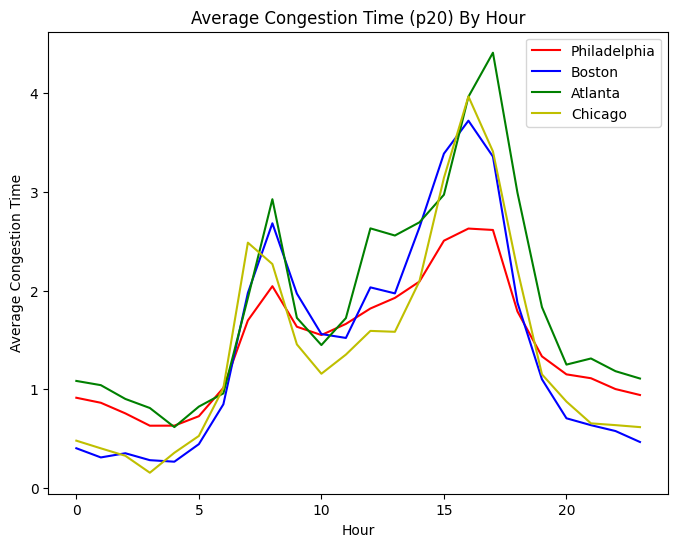

In [ ]:
import matplotlib.pyplot as plt
Philadelphia = []
Boston = []
Atlanta = []
Chicago = []
hours = [n for n in range(0,24)]
for hour in hours:
    p_congestion_time = sum(df[(df['Hour'] == hour) & (df['City'] == 'Philadelphia')]['TotalTimeStopped_p20'])
    p_congestion_time_avg = p_congestion_time/(df[(df['Hour'] == hour) & (df['City'] == 'Philadelphia')]['TotalTimeStopped_p20']).count()
    b_congestion_time = sum(df[(df['Hour'] == hour) & (df['City'] == 'Boston')]['TotalTimeStopped_p20'])
    b_congestion_time_avg = b_congestion_time/(df[(df['Hour'] == hour) & (df['City'] == 'Boston')]['TotalTimeStopped_p20']).count()
    a_congestion_time = sum(df[(df['Hour'] == hour) & (df['City'] == 'Atlanta')]['TotalTimeStopped_p20'])
    a_congestion_time_avg = a_congestion_time/(df[(df['Hour'] == hour) & (df['City'] == 'Atlanta')]['TotalTimeStopped_p20']).count()
    c_congestion_time = sum(df[(df['Hour'] == hour) & (df['City'] == 'Chicago')]['TotalTimeStopped_p20'])
    c_congestion_time_avg = c_congestion_time/(df[(df['Hour'] == hour) & (df['City'] == 'Chicago')]['TotalTimeStopped_p20']).count()
    Philadelphia.append(p_congestion_time_avg)
    Boston.append(b_congestion_time_avg)
    Atlanta.append(a_congestion_time_avg)
    Chicago.append(c_congestion_time_avg)
print(len(Philadelphia))

f,ax = plt.subplots(figsize=(8,6))
ax.plot(hours, Philadelphia, label = 'Philadelphia', color='r')
ax.plot(hours, Boston, label = 'Boston', color='b')
ax.plot(hours, Atlanta, label = 'Atlanta', color='g')
ax.plot(hours, Chicago, label = 'Chicago', color='y')
leg = ax.legend()
plt.ylabel("Average Congestion Time")
plt.xlabel("Hour")
plt.title("Average Congestion Time (p20) By Hour")

In [ ]:
# df = pd.read_csv(train_csv_path)
x_train = df[['IntersectionId','EntryHeading','ExitHeading']]
x_train = pd.concat([x_train,pd.get_dummies(df["City"],dummy_na=False, drop_first=False, dtype=int)],axis=1)
print(x_train.head())
heading_map = {'N':1,'NE':2,'E':3,'SE':4,'S':5, 'SW':6, 'W':7, 'NW': 8}
x_train['EntryHeading'] = x_train['EntryHeading'].replace(heading_map)
x_train['ExitHeading'] = x_train['ExitHeading'].replace(heading_map)
x_train['EntryHeading'] = x_train['EntryHeading'].replace(heading_map)
x_train['ExitHeading'] = x_train['ExitHeading'].replace(heading_map)
print(x_train)


   IntersectionId EntryHeading ExitHeading  Atlanta  Boston  Chicago  \
0               0           NW          NW        1       0        0   
1               0           SE          SE        1       0        0   
2               0           NW          NW        1       0        0   
3               0           SE          SE        1       0        0   
4               0           NW          NW        1       0        0   

   Philadelphia  
0             0  
1             0  
2             0  
3             0  
4             0  


/tmp/ipython-input-4203446541.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_train['EntryHeading'] = x_train['EntryHeading'].replace(heading_map)


        IntersectionId  EntryHeading  ExitHeading  Atlanta  Boston  Chicago  \
0                    0             8            8        1       0        0   
1                    0             4            4        1       0        0   
2                    0             8            8        1       0        0   
3                    0             4            4        1       0        0   
4                    0             8            8        1       0        0   
...                ...           ...          ...      ...     ...      ...   
856382            1990             5            7        0       0        0   
856383            1990             5            5        0       0        0   
856384            1990             5            5        0       0        0   
856385            1990             7            7        0       0        0   
856386            1990             5            5        0       0        0   

        Philadelphia  
0                  0  
1    

/tmp/ipython-input-4203446541.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_train['ExitHeading'] = x_train['ExitHeading'].replace(heading_map)


In [ ]:
df_test = pd.read_csv(test_csv_path)
x_test = df_test[['IntersectionId','EntryHeading','ExitHeading']]
x_test = pd.concat([x_test,pd.get_dummies(df_test["City"],dummy_na=False, drop_first=False, dtype=int)],axis=1)
print(x_test.head())
heading_map = {'N':1,'NE':2,'E':3,'SE':4,'S':5, 'SW':6, 'W':7, 'NW': 8}
x_test['EntryHeading'] = x_test['EntryHeading'].replace(heading_map)
x_test['ExitHeading'] = x_test['ExitHeading'].replace(heading_map)
x_test['EntryHeading'] = x_test['EntryHeading'].replace(heading_map)
x_test['ExitHeading'] = x_test['ExitHeading'].replace(heading_map)
print(x_test)

   IntersectionId EntryHeading ExitHeading  Atlanta  Boston  Chicago  \
0               1           NE          NE        1       0        0   
1               1           SW          SE        1       0        0   
2               1           SW          SW        1       0        0   
3               1           NE          NE        1       0        0   
4               1           SW          SW        1       0        0   

   Philadelphia  
0             0  
1             0  
2             0  
3             0  
4             0  


/tmp/ipython-input-775803924.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_test['EntryHeading'] = x_test['EntryHeading'].replace(heading_map)


         IntersectionId  EntryHeading  ExitHeading  Atlanta  Boston  Chicago  \
0                     1             2            2        1       0        0   
1                     1             6            4        1       0        0   
2                     1             6            6        1       0        0   
3                     1             2            2        1       0        0   
4                     1             6            6        1       0        0   
...                 ...           ...          ...      ...     ...      ...   
1921352            1990             5            7        0       0        0   
1921353            1990             5            5        0       0        0   
1921354            1990             5            7        0       0        0   
1921355            1990             5            5        0       0        0   
1921356            1990             5            5        0       0        0   

         Philadelphia  
0              

/tmp/ipython-input-775803924.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x_test['ExitHeading'] = x_test['ExitHeading'].replace(heading_map)


In [ ]:
# Hour: 0-23 cyclical -> [sin(2pi*hour/24), cos(2pi*hour/24)]
df['hour_sin'] = np.sin(2*np.pi*df['Hour']/24)
df['hour_cos'] = np.cos(2*np.pi*df['Hour']/24)
print(df.head())
print(df['Month'].unique())

df['month_sin'] = np.sin(2*np.pi*df['Month']/12)
df['month_cos'] = np.cos(2*np.pi*df['Month']/12)
print(df.head())

     RowId  IntersectionId   Latitude  Longitude  \
0  1921357               0  33.791659 -84.430032   
1  1921358               0  33.791659 -84.430032   
2  1921359               0  33.791659 -84.430032   
3  1921360               0  33.791659 -84.430032   
4  1921361               0  33.791659 -84.430032   

                EntryStreetName                ExitStreetName EntryHeading  \
0  Marietta Boulevard Northwest  Marietta Boulevard Northwest           NW   
1  Marietta Boulevard Northwest  Marietta Boulevard Northwest           SE   
2  Marietta Boulevard Northwest  Marietta Boulevard Northwest           NW   
3  Marietta Boulevard Northwest  Marietta Boulevard Northwest           SE   
4  Marietta Boulevard Northwest  Marietta Boulevard Northwest           NW   

  ExitHeading  Hour  Weekend  ...  TimeFromFirstStop_p60  \
0          NW     0        0  ...                    0.0   
1          SE     0        0  ...                    0.0   
2          NW     1        0  ...     

In [ ]:
# Hour: 0-23 cyclical -> [sin(2pi*hour/24), cos(2pi*hour/24)]
df_test['hour_sin'] = np.sin(2*np.pi*df_test['Hour']/24)
df_test['hour_cos'] = np.cos(2*np.pi*df_test['Hour']/24)
print(df_test.head())
print(df_test['Month'].unique())

df_test['month_sin'] = np.sin(2*np.pi*df_test['Month']/12)
df_test['month_cos'] = np.cos(2*np.pi*df_test['Month']/12)
print(df_test.head())

   RowId  IntersectionId  Latitude  Longitude             EntryStreetName  \
0      0               1  33.75094 -84.393032  Peachtree Street Southwest   
1      1               1  33.75094 -84.393032  Peachtree Street Southwest   
2      2               1  33.75094 -84.393032  Peachtree Street Southwest   
3      3               1  33.75094 -84.393032  Peachtree Street Southwest   
4      4               1  33.75094 -84.393032  Peachtree Street Southwest   

               ExitStreetName EntryHeading ExitHeading  Hour  Weekend  Month  \
0  Peachtree Street Southwest           NE          NE     0        0      6   
1   Mitchell Street Southwest           SW          SE     0        0      6   
2  Peachtree Street Southwest           SW          SW     0        0      6   
3  Peachtree Street Southwest           NE          NE     1        0      6   
4  Peachtree Street Southwest           SW          SW     1        0      6   

                                                Path    

In [ ]:
x_train['hour_sin'] = df['hour_sin']
x_train['hour_cos'] = df['hour_cos']
# x_train['Hour'] = df['Hour']
x_train['month_sin'] = df['month_sin']
x_train['month_cos'] = df['month_cos']
# x_train['Month'] = df['Month']
x_train['Weekend'] = df['Weekend']
print(x_train)

        IntersectionId  EntryHeading  ExitHeading  Atlanta  Boston  Chicago  \
0                    0             8            8        1       0        0   
1                    0             4            4        1       0        0   
2                    0             8            8        1       0        0   
3                    0             4            4        1       0        0   
4                    0             8            8        1       0        0   
...                ...           ...          ...      ...     ...      ...   
856382            1990             5            7        0       0        0   
856383            1990             5            5        0       0        0   
856384            1990             5            5        0       0        0   
856385            1990             7            7        0       0        0   
856386            1990             5            5        0       0        0   

        Philadelphia  hour_sin      hour_cos     mo

In [ ]:
x_test['hour_sin'] = df_test['hour_sin']
x_test['hour_cos'] = df_test['hour_cos']
# x_train['Hour'] = df['Hour']
x_test['month_sin'] = df_test['month_sin']
x_test['month_cos'] = df_test['month_cos']
# x_train['Month'] = df['Month']
x_test['Weekend'] = df_test['Weekend']
print(x_test)

         IntersectionId  EntryHeading  ExitHeading  Atlanta  Boston  Chicago  \
0                     1             2            2        1       0        0   
1                     1             6            4        1       0        0   
2                     1             6            6        1       0        0   
3                     1             2            2        1       0        0   
4                     1             6            6        1       0        0   
...                 ...           ...          ...      ...     ...      ...   
1921352            1990             5            7        0       0        0   
1921353            1990             5            5        0       0        0   
1921354            1990             5            7        0       0        0   
1921355            1990             5            5        0       0        0   
1921356            1990             5            5        0       0        0   

         Philadelphia  hour_sin  hour_c

In [ ]:
y_train = pd.DataFrame()
y_train['TotalTimeStopped_p20'] = df['TotalTimeStopped_p20']
y_train['TotalTimeStopped_p50'] = df['TotalTimeStopped_p50']
y_train['TotalTimeStopped_p80'] = df['TotalTimeStopped_p80']
y_train['DistanceToFirstStop_p20'] = df['DistanceToFirstStop_p20']
y_train['DistanceToFirstStop_p50'] = df['DistanceToFirstStop_p50']
y_train['DistanceToFirstStop_p80'] = df['DistanceToFirstStop_p80']
print(y_train.head())

   TotalTimeStopped_p20  TotalTimeStopped_p50  TotalTimeStopped_p80  \
0                   0.0                   0.0                   0.0   
1                   0.0                   0.0                   0.0   
2                   0.0                   0.0                   0.0   
3                   0.0                   0.0                   0.0   
4                   0.0                   0.0                   0.0   

   DistanceToFirstStop_p20  DistanceToFirstStop_p50  DistanceToFirstStop_p80  
0                      0.0                      0.0                      0.0  
1                      0.0                      0.0                      0.0  
2                      0.0                      0.0                      0.0  
3                      0.0                      0.0                      0.0  
4                      0.0                      0.0                      0.0  


In [ ]:
#Split data into train and val
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

Correlation matrix to check attributes performance

In [ ]:
corr = x_train.corr()
corr.style.background_gradient(cmap='coolwarm')

,IntersectionId,EntryHeading,ExitHeading,Atlanta,Boston,Chicago,Philadelphia,hour_sin,hour_cos,month_sin,month_cos,Weekend
IntersectionId,1.000000,-0.015122,-0.013067,-0.424967,-0.178375,0.381849,0.199124,0.020899,-0.065014,-0.005676,-0.015042,-0.077367
EntryHeading,-0.015122,1.000000,0.699636,-0.003592,0.072495,-0.050607,-0.019769,-0.010069,-0.011398,0.001534,0.003225,-0.002287
ExitHeading,-0.013067,0.699636,1.000000,-0.006753,0.066146,-0.049069,-0.013248,-0.008797,-0.011617,0.002642,0.002521,-0.001235
Atlanta,-0.424967,-0.003592,-0.006753,1.000000,-0.242636,-0.200925,-0.432533,-0.040827,0.078897,-0.004988,-0.012990,0.085468
Boston,-0.178375,0.072495,0.066146,-0.242636,1.000000,-0.218231,-0.469790,0.078168,-0.099175,0.029440,0.036987,-0.079519
Chicago,0.381849,-0.050607,-0.049069,-0.200925,-0.218231,1.000000,-0.389029,0.072876,-0.181277,0.001257,-0.050435,-0.219438
Philadelphia,0.199124,-0.019769,-0.013248,-0.432533,-0.469790,-0.389029,1.000000,-0.084780,0.150750,-0.021056,0.016364,0.157205
hour_sin,0.020899,-0.010069,-0.008797,-0.040827,0.078168,0.072876,-0.084780,1.000000,-0.107191,-0.012046,-0.061525,-0.082871
hour_cos,-0.065014,-0.011398,-0.011617,0.078897,-0.099175,-0.181277,0.150750,-0.107191,1.000000,-0.033981,0.060012,0.160581
month_sin,-0.005676,0.001534,0.002642,-0.004988,0.029440,0.001257,-0.021056,-0.012046,-0.033981,1.000000,0.040496,0.001527


## Baseline-Linear Regression

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
reg = LinearRegression().fit(x_train, y_train)
y_pred = reg.predict(x_val)
print(y_pred.shape)
rmse_time_p20 = np.sqrt(mean_squared_error(y_val['TotalTimeStopped_p20'], y_pred[:,0]))
rmse_time_p50 = np.sqrt(mean_squared_error(y_val['TotalTimeStopped_p50'], y_pred[:,1]))
rmse_time_p80 = np.sqrt(mean_squared_error(y_val['TotalTimeStopped_p80'], y_pred[:,2]))
rmse_distance_p20 = np.sqrt(mean_squared_error(y_val['DistanceToFirstStop_p20'], y_pred[:,3]))
rmse_distance_p50 = np.sqrt(mean_squared_error(y_val['DistanceToFirstStop_p50'], y_pred[:,4]))
rmse_distance_p80 = np.sqrt(mean_squared_error(y_val['DistanceToFirstStop_p80'], y_pred[:,5]))

cvs = cross_val_score(reg, x_train, y_train, cv=5)

r2_score = reg.score(x_val, y_val)
rmse_total = np.sqrt(mean_squared_error(y_val, y_pred))
print("R2 Score:", r2_score)
print("TotalTimeStopped_p20 RMSE:", rmse_time_p20)
print("TotalTimeStopped_p50 RMSE:", rmse_time_p50)
print("TotalTimeStopped_p80 RMSE:", rmse_time_p80)
print("DistanceToFirstStop_p20 RMSE:", rmse_distance_p20)
print("DistanceToFirstStop_p50 RMSE:", rmse_distance_p50)
print("DistanceToFirstStop_p80 RMSE:", rmse_distance_p80)
print("Cross Validation Score:", cvs)
print("Total RMSE:", rmse_total)


(171278, 6)
R2 Score: 0.022877431873890002
TotalTimeStopped_p20 RMSE: 7.116015460925015
TotalTimeStopped_p50 RMSE: 15.442481704481027
TotalTimeStopped_p80 RMSE: 27.46178792316862
DistanceToFirstStop_p20 RMSE: 31.203936871912866
DistanceToFirstStop_p50 RMSE: 76.02959885701638
DistanceToFirstStop_p80 RMSE: 159.73420759018683
Cross Validation Score: [0.02341042 0.02320945 0.02263624 0.02344904 0.02316509]
Total RMSE: 74.512258908966


In [ ]:
import numpy as np
print("y_train mean:", np.mean(y_train))
print("y_train std:", np.std(y_train))
print("y_train min:", np.min(y_train))
print("y_train max:", np.max(y_train))


y_train mean: 25.300026857040265
y_train std: TotalTimeStopped_p20         7.145344
TotalTimeStopped_p50        15.681923
TotalTimeStopped_p80        28.282988
DistanceToFirstStop_p20     29.079167
DistanceToFirstStop_p50     74.878299
DistanceToFirstStop_p80    160.531433
dtype: float64
y_train min: 0.0
y_train max: 4079.2


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3800: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


## LSTM Ablation Study 1 - Adding extra layer for LSTM

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [ ]:
SEQ_LEN    = 12    # number of rows per sequence
BATCH_SIZE = 256   # trade-off between gradient stability and memory
EPOCHS     = 10
LR         = 1e-3
SEED       = 42


loss_fn = keras.losses.Huber()
# fixed randomness
np.random.seed(SEED)
tf.random.set_seed(SEED)

# sort by time (Month, Hour)
# since LSTM need chronologically ordered
required_df_cols = ['Month', 'Hour', 'City', 'IntersectionId']
missing_any = False
for c in required_df_cols:
    if c not in df.columns:
        print("ERROR: Missing column in df:", c)
        missing_any = True

feature_cols = list(x_train.columns)   # your engineered X columns (one-hots, headings, cyclical time, etc.)?no month sin here?
target_cols  = list(y_train.columns)   # the 6 regression targets

print("Number of feature columns:", len(feature_cols))
print("Feature columns:", feature_cols)
print("Target columns:", target_cols)

if missing_any:
    print("Please make sure df contains Month/Hour/City/IntersectionId before proceeding.")



def make_sequences_from_split(X_split, Y_split, seq_len):
    tmp = X_split.copy()

    # Rebuild a city key from your one-hot columns
    city_cols = [c for c in ['Atlanta','Boston','Chicago','Philadelphia'] if c in tmp.columns]
    if len(city_cols) == 0:
        raise ValueError("City one-hot columns not found in X. Expected any of: Atlanta/Boston/Chicago/Philadelphia.")
    tmp['CityKey'] = tmp[city_cols].idxmax(axis=1)

    # Reconstruct sortable cyclic angles for month/hour from your sin/cos features
    for need in ['hour_sin','hour_cos','month_sin','month_cos']:
        if need not in tmp.columns:
            raise ValueError(f"Missing column '{need}' in X needed to sort time for sequence building.")

    # atan2 → (-pi, pi]; map to [0, 2pi) so it's strictly sortable
    tmp['hour_angle']  = np.mod(np.arctan2(tmp['hour_sin'],  tmp['hour_cos']) + 2.0*np.pi, 2.0*np.pi)
    tmp['month_angle'] = np.mod(np.arctan2(tmp['month_sin'], tmp['month_cos']) + 2.0*np.pi, 2.0*np.pi)

    # Keep feature order consistent and valid
    valid_feat_cols = [c for c in feature_cols if c in tmp.columns]

    # Sort within (City, IntersectionId) by month then hour
    tmp_sorted = tmp.sort_values(['CityKey', 'IntersectionId', 'month_angle', 'hour_angle'])

    # Align Y to the same order
    Y_sorted = Y_split.loc[tmp_sorted.index]

    X_list, Y_list = [], []

    # Group by (CityKey, IntersectionId) so we never mix different locations in one sequence
    for (_, _), gdf in tmp_sorted.groupby(['CityKey','IntersectionId'], sort=False):
        if len(gdf) < seq_len:
            continue

        Xg = gdf[valid_feat_cols].to_numpy(dtype=np.float32)
        Yg = Y_sorted.loc[gdf.index].to_numpy(dtype=np.float32)

        # Sliding window; label is the window's last timestep
        for i in range(seq_len - 1, len(gdf)):
            start = i - seq_len + 1
            X_list.append(Xg[start:i+1])   # shape: (seq_len, feat_dim)
            Y_list.append(Yg[i])           # shape: (num_targets,)

    if not X_list:
        print("No sequences were created. Try reducing SEQ_LEN")
        return (
            np.empty((0, seq_len, len(valid_feat_cols)), np.float32),
            np.empty((0, Y_split.shape[1]), np.float32)
        )

    return np.stack(X_list).astype(np.float32), np.stack(Y_list).astype(np.float32)


# Build sequences for train/val (no scaling applied above)
Xtr_seq, ytr_seq = make_sequences_from_split(x_train, y_train, SEQ_LEN)
Xva_seq, yva_seq = make_sequences_from_split(x_val,   y_val,   SEQ_LEN)

print("x_train seq shape:", Xtr_seq.shape, "y_train shape:", ytr_seq.shape)
print("x_val   seq shape:", Xva_seq.shape, "y_val shape:", yva_seq.shape)

if Xtr_seq.shape[0] == 0 or Xva_seq.shape[0] == 0:
    print("No sequences built. Check SEQ_LEN or key columns in df (City/IntersectionId/Month/Hour).")


# LSTM head
def build_head_model(input_seq_len, input_feat_dim, out_dim=3, lstm_units=64, dense_units=128, dropout=0.1):
    model = keras.Sequential()
    model.add(layers.Input(shape=(input_seq_len, input_feat_dim)))
    model.add(layers.LSTM(lstm_units, return_sequences=True))
    model.add(layers.LSTM(lstm_units, return_sequences=False))
    model.add(layers.Dropout(dropout))
    model.add(layers.Dense(dense_units, activation="relu"))
    # model.add(layers.Dense(dense_units, activation="relu"))
    model.add(layers.Dense(out_dim))  # outputs [p20, p50, p80]

    model.compile(
        optimizer=keras.optimizers.Adam(LR),
        loss='mse',
        metrics=[keras.metrics.RootMeanSquaredError(name="rmse")]
    )
    return model

# Prepare labels for TIME and DISTANCE heads (N,3)
time_cols = ['TotalTimeStopped_p20','TotalTimeStopped_p50','TotalTimeStopped_p80']
dist_cols = ['DistanceToFirstStop_p20','DistanceToFirstStop_p50','DistanceToFirstStop_p80']

time_idx = [target_cols.index(c) for c in time_cols]
dist_idx = [target_cols.index(c) for c in dist_cols]

ytr_time = ytr_seq[:, time_idx]
yva_time = yva_seq[:, time_idx]
ytr_dist = ytr_seq[:, dist_idx]
yva_dist = yva_seq[:, dist_idx]

# Callbacks
callbacks = [
    keras.callbacks.ReduceLROnPlateau(monitor="val_rmse", factor=0.5, patience=3, verbose=1),
    keras.callbacks.EarlyStopping(monitor="val_rmse", patience=7, restore_best_weights=True, verbose=1)
]

# Train TIME model
print("\nTraining TIME model...")
time_model = build_head_model(Xtr_seq.shape[1], Xtr_seq.shape[2], out_dim=3)
time_model.fit(
    Xtr_seq, ytr_time,
    validation_data=(Xva_seq, yva_time),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    verbose=1
)

# Train DISTANCE model
print("\nTraining DISTANCE model...")
dist_model = build_head_model(Xtr_seq.shape[1], Xtr_seq.shape[2], out_dim=3)
dist_model.fit(
    Xtr_seq, ytr_dist,
    validation_data=(Xva_seq, yva_dist),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    verbose=1
)

# Validation prediction + per-column RMSE
print("\nPredicting on validation set...")

pred_time = time_model.predict(Xva_seq, batch_size=BATCH_SIZE, verbose=0)  # (N, 3)
pred_dist = dist_model.predict(Xva_seq, batch_size=BATCH_SIZE, verbose=0)  # (N, 3)

def rmse_each_column(y_true, y_pred, names):
    scores = {}
    for i, name in enumerate(names):
        mse  = mean_squared_error(y_true[:, i], y_pred[:, i])
        rmse = float(np.sqrt(mse))
        scores[name] = rmse
    return scores

rmse_time = rmse_each_column(yva_time, pred_time, time_cols)
rmse_dist = rmse_each_column(yva_dist, pred_dist, dist_cols)

print("\n=== RMSE===")
for k, v in rmse_time.items():
    print(k.ljust(30), ":", round(v, 4))
for k, v in rmse_dist.items():
    print(k.ljust(30), ":", round(v, 4))


Number of feature columns: 12
Feature columns: ['IntersectionId', 'EntryHeading', 'ExitHeading', 'Atlanta', 'Boston', 'Chicago', 'Philadelphia', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'Weekend']
Target columns: ['TotalTimeStopped_p20', 'TotalTimeStopped_p50', 'TotalTimeStopped_p80', 'DistanceToFirstStop_p20', 'DistanceToFirstStop_p50', 'DistanceToFirstStop_p80']
x_train seq shape: (634740, 12, 12) y_train shape: (634740, 6)
x_val   seq shape: (126757, 12, 12) y_val shape: (126757, 6)

Training TIME model...
Epoch 1/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 186s 72ms/step - loss: 375.1028 - rmse: 19.3625 - val_loss: 368.6854 - val_rmse: 19.2012 - learning_rate: 0.0010
Epoch 2/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 180s 73ms/step - loss: 351.9247 - rmse: 18.7588 - val_loss: 366.7200 - val_rmse: 19.1499 - learning_rate: 0.0010
Epoch 3/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 174s 70ms/step - loss: 343.7234 - rmse: 18.5391 - val_loss: 364.4720 - val_rmse: 19.0912 - learning_rate: 0.0010
Epoch 4/10


In [ ]:
y_pred_total = np.concatenate((pred_time,pred_dist), axis = 1)
y_val_total = np.concatenate((yva_time,yva_dist), axis = 1)
rmse_total = np.sqrt(mean_squared_error(y_val_total, y_pred_total))
print('rmse_total: ', rmse_total)

rmse_total:  76.99155290517265


## LSTM Ablation Study 2 - Changing optimizer

In [ ]:
SEQ_LEN    = 12    # number of rows per sequence
BATCH_SIZE = 256   # trade-off between gradient stability and memory
EPOCHS     = 10
LR         = 1e-2
SEED       = 42

loss_fn = keras.losses.Huber()
# fixed randomness
np.random.seed(SEED)
tf.random.set_seed(SEED)

# sort by time (Month, Hour)
# since LSTM need chronologically ordered
required_df_cols = ['Month', 'Hour', 'City', 'IntersectionId']
missing_any = False
for c in required_df_cols:
    if c not in df.columns:
        print("ERROR: Missing column in df:", c)
        missing_any = True

feature_cols = list(x_train.columns)   # your engineered X columns (one-hots, headings, cyclical time, etc.)?no month sin here?
target_cols  = list(y_train.columns)   # the 6 regression targets

print("Number of feature columns:", len(feature_cols))
print("Feature columns:", feature_cols)
print("Target columns:", target_cols)

if missing_any:
    print("Please make sure df contains Month/Hour/City/IntersectionId before proceeding.")



def make_sequences_from_split(X_split, Y_split, seq_len):
    tmp = X_split.copy()

    # Rebuild a city key from your one-hot columns
    city_cols = [c for c in ['Atlanta','Boston','Chicago','Philadelphia'] if c in tmp.columns]
    if len(city_cols) == 0:
        raise ValueError("City one-hot columns not found in X. Expected any of: Atlanta/Boston/Chicago/Philadelphia.")
    tmp['CityKey'] = tmp[city_cols].idxmax(axis=1)

    # Reconstruct sortable cyclic angles for month/hour from your sin/cos features
    for need in ['hour_sin','hour_cos','month_sin','month_cos']:
        if need not in tmp.columns:
            raise ValueError(f"Missing column '{need}' in X needed to sort time for sequence building.")

    # atan2 → (-pi, pi]; map to [0, 2pi) so it's strictly sortable
    tmp['hour_angle']  = np.mod(np.arctan2(tmp['hour_sin'],  tmp['hour_cos']) + 2.0*np.pi, 2.0*np.pi)
    tmp['month_angle'] = np.mod(np.arctan2(tmp['month_sin'], tmp['month_cos']) + 2.0*np.pi, 2.0*np.pi)

    # Keep feature order consistent and valid
    valid_feat_cols = [c for c in feature_cols if c in tmp.columns]

    # Sort within (City, IntersectionId) by month then hour
    tmp_sorted = tmp.sort_values(['CityKey', 'IntersectionId', 'month_angle', 'hour_angle'])

    # Align Y to the same order
    Y_sorted = Y_split.loc[tmp_sorted.index]

    X_list, Y_list = [], []

    # Group by (CityKey, IntersectionId) so we never mix different locations in one sequence
    for (_, _), gdf in tmp_sorted.groupby(['CityKey','IntersectionId'], sort=False):
        if len(gdf) < seq_len:
            continue

        Xg = gdf[valid_feat_cols].to_numpy(dtype=np.float32)
        Yg = Y_sorted.loc[gdf.index].to_numpy(dtype=np.float32)

        # Sliding window; label is the window's last timestep
        for i in range(seq_len - 1, len(gdf)):
            start = i - seq_len + 1
            X_list.append(Xg[start:i+1])   # shape: (seq_len, feat_dim)
            Y_list.append(Yg[i])           # shape: (num_targets,)

    if not X_list:
        print("No sequences were created. Try reducing SEQ_LEN")
        return (
            np.empty((0, seq_len, len(valid_feat_cols)), np.float32),
            np.empty((0, Y_split.shape[1]), np.float32)
        )

    return np.stack(X_list).astype(np.float32), np.stack(Y_list).astype(np.float32)


# Build sequences for train/val (no scaling applied above)
Xtr_seq, ytr_seq = make_sequences_from_split(x_train, y_train, SEQ_LEN)
Xva_seq, yva_seq = make_sequences_from_split(x_val,   y_val,   SEQ_LEN)

print("x_train seq shape:", Xtr_seq.shape, "y_train shape:", ytr_seq.shape)
print("x_val   seq shape:", Xva_seq.shape, "y_val shape:", yva_seq.shape)

if Xtr_seq.shape[0] == 0 or Xva_seq.shape[0] == 0:
    print("No sequences built. Check SEQ_LEN or key columns in df (City/IntersectionId/Month/Hour).")


# LSTM head
def build_head_model(input_seq_len, input_feat_dim, out_dim=3, lstm_units=64, dense_units=128, dropout=0.1):
    model = keras.Sequential()
    model.add(layers.Input(shape=(input_seq_len, input_feat_dim)))
    # model.add(layers.LSTM(lstm_units, return_sequences=True))
    model.add(layers.LSTM(lstm_units, return_sequences=False))
    model.add(layers.Dropout(dropout))
    model.add(layers.Dense(dense_units, activation="relu"))
    # model.add(layers.Dense(dense_units, activation="relu"))
    model.add(layers.Dense(out_dim))  # outputs [p20, p50, p80]

    model.compile(
        optimizer=keras.optimizers.SGD(LR),
        loss='mse',
        metrics=[keras.metrics.RootMeanSquaredError(name="rmse")]
    )
    return model

# Prepare labels for TIME and DISTANCE heads (N,3)
time_cols = ['TotalTimeStopped_p20','TotalTimeStopped_p50','TotalTimeStopped_p80']
dist_cols = ['DistanceToFirstStop_p20','DistanceToFirstStop_p50','DistanceToFirstStop_p80']

time_idx = [target_cols.index(c) for c in time_cols]
dist_idx = [target_cols.index(c) for c in dist_cols]

ytr_time = ytr_seq[:, time_idx]
yva_time = yva_seq[:, time_idx]
ytr_dist = ytr_seq[:, dist_idx]
yva_dist = yva_seq[:, dist_idx]

# Callbacks
callbacks = [
    keras.callbacks.ReduceLROnPlateau(monitor="val_rmse", factor=0.5, patience=3, verbose=1),
    keras.callbacks.EarlyStopping(monitor="val_rmse", patience=7, restore_best_weights=True, verbose=1)
]

# Train TIME model
print("\nTraining TIME model...")
time_model = build_head_model(Xtr_seq.shape[1], Xtr_seq.shape[2], out_dim=3)
time_model.fit(
    Xtr_seq, ytr_time,
    validation_data=(Xva_seq, yva_time),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    verbose=1
)

# Train DISTANCE model
print("\nTraining DISTANCE model...")
dist_model = build_head_model(Xtr_seq.shape[1], Xtr_seq.shape[2], out_dim=3)
dist_model.fit(
    Xtr_seq, ytr_dist,
    validation_data=(Xva_seq, yva_dist),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    verbose=1
)

# Validation prediction + per-column RMSE
print("\nPredicting on validation set...")

pred_time = time_model.predict(Xva_seq, batch_size=BATCH_SIZE, verbose=0)  # (N, 3)
pred_dist = dist_model.predict(Xva_seq, batch_size=BATCH_SIZE, verbose=0)  # (N, 3)

def rmse_each_column(y_true, y_pred, names):
    scores = {}
    for i, name in enumerate(names):
        mse  = mean_squared_error(y_true[:, i], y_pred[:, i])
        rmse = float(np.sqrt(mse))
        scores[name] = rmse
    return scores

rmse_time = rmse_each_column(yva_time, pred_time, time_cols)
rmse_dist = rmse_each_column(yva_dist, pred_dist, dist_cols)

print("\n=== RMSE===")
for k, v in rmse_time.items():
    print(k.ljust(30), ":", round(v, 4))
for k, v in rmse_dist.items():
    print(k.ljust(30), ":", round(v, 4))


Number of feature columns: 12
Feature columns: ['IntersectionId', 'EntryHeading', 'ExitHeading', 'Atlanta', 'Boston', 'Chicago', 'Philadelphia', 'hour_sin', 'hour_cos', 'month_sin', 'month_cos', 'Weekend']
Target columns: ['TotalTimeStopped_p20', 'TotalTimeStopped_p50', 'TotalTimeStopped_p80', 'DistanceToFirstStop_p20', 'DistanceToFirstStop_p50', 'DistanceToFirstStop_p80']
x_train seq shape: (634740, 12, 12) y_train shape: (634740, 6)
x_val   seq shape: (126757, 12, 12) y_val shape: (126757, 6)

Training TIME model...
Epoch 1/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 86s 34ms/step - loss: 385.1765 - rmse: 19.6254 - val_loss: 432.0175 - val_rmse: 20.7850 - learning_rate: 0.0100
Epoch 2/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 75s 30ms/step - loss: 377.7510 - rmse: 19.4350 - val_loss: 402.2939 - val_rmse: 20.0573 - learning_rate: 0.0100
Epoch 3/10
2480/2480 ━━━━━━━━━━━━━━━━━━━━ 74s 30ms/step - loss: 376.0865 - rmse: 19.3919 - val_loss: 395.9316 - val_rmse: 19.8980 - learning_rate: 0.0100
Epoch 4/10
248

In [ ]:
y_pred_total = np.concatenate((pred_time,pred_dist), axis = 1)
y_val_total = np.concatenate((yva_time,yva_dist), axis = 1)
rmse_total = np.sqrt(mean_squared_error(y_val_total, y_pred_total))
print('rmse_total: ', rmse_total)

rmse_total:  79.90406845868362
